# Pregled in analiza najbolj popularnih pesmi leta 2018
Kot vsakodnevni uživalec in ustvarjalec tako popularne kot manj popularne glasbe sem bil skorajda primoran poskušati poiskati pot do popolnega univerzalnega recepta za hit pesem leta 2018. Recepta, ki do sedaj še ni bil najden. Ali bo še naprej ostal skrit?
Seveda, ker se osnovno znanje programiranja in nekaj podatkov, ki jih ponuja https://www.billboard.com/, ni izkazalo dovolj za odkritje takšne magnitude. Morda svet ni bil pripravljen. Vseeno sem se trudil z iskanjem povezav med popularnostjo pesmi (najvišje mesto, ki ga je dosegla na lestvici, število tednov bivanja pesmi na lestvici, ipd.) in nekaterimi ostalimi podatki o pesmi, ki sem jih uspel izluščiti (število črk oz. besed v naslovu, število izvajalcev pesmi).

In [43]:
import pandas as pd
%matplotlib inline

pd.options.display.max_rows = 20
data = pd.read_csv('videne.csv',index_col = 'id').drop(columns = ['mesto_na_lestvici','tednov'])

grpd = data.groupby('izvajalec').size().to_frame('vseh_od_izv')
pesmi = pd.merge(data, grpd, on='izvajalec')
pesmi['st_izv'] = 1 + pesmi['izvajalec'].str.count('Featuring') + pesmi['izvajalec'].str.count(',') + pesmi['izvajalec'].str.count('&')
pesmi['wrdz'] = 1 + pesmi['naslov'].str.count(' ')
pesmi['ltrz'] = (pesmi['naslov'].str.replace(' ','')).str.len()

# Splošne opazke
Na Billboardovi strani lahko za vsak teden od začetka avgusta leta 1958 najdemo lestvico 100 najpopularnejših pesmi tistega tedna. Mene je zanimalo le 52 tednov, ki so imeli kakšen dan leta 2018. Tega leta se je na lestvicah zvrstilo le 704 pesmi, kar v povprečju ne pomeni niti dveh novih pesmi na dan. Osem parov različnih pesmi je imelo enak naslov, kar tri pesmi pa so bile naslovljene 'Friends', kar smatram kot opomnik kako pomembni so prijatelji.
Poleg novih hitov sem našel tudi nekaj starejših pesmi, med drugim 'Thriller' iz leta 1982, božično klasiko Deana Martina, 'Let it snow', ter, zahvaljujoč slavi istoimenskega filma, tudi 'Bohemian Rhapsody'.

In [44]:
pesmi

,izvajalec,naslov,tednov_na_lestvici,najvišje_mesto,povp_mesto,feat,vseh_od_izv,st_izv,wrdz,ltrz
0,Ed Sheeran,Perfect,57,1,12.000000,False,2,1,1,7
1,Ed Sheeran,Shape Of You,59,1,21.111111,False,2,1,3,10
2,Post Malone Featuring 21 Savage,Rockstar,41,1,15.370370,True,1,2,1,8
3,Camila Cabello Featuring Young Thug,Havana,46,1,14.555556,True,1,2,1,6
4,G-Eazy Featuring A$AP Rocky & Cardi B,No Limit,29,4,21.285714,True,1,3,2,7
...,...,...,...,...,...,...,...,...,...,...
699,Kodak Black Featuring Juice WRLD,MoshPit,1,58,58.000000,True,1,2,1,7
700,Katy Perry,Cozy Little Christmas,1,68,68.000000,False,1,1,3,19
701,Ava Max,Sweet But Psycho,1,87,87.000000,False,1,1,3,14
702,Kodak Black Featuring Lil Pump,Gnarly,1,88,88.000000,True,1,2,1,6


In [27]:
pesmi.groupby('vseh_od_izv').size()

vseh_od_izv
1     368
2      68
3      48
4      36
5      25
6      24
7      14
8      16
10     10
11     11
13     13
14     14
17     34
23     23
dtype: int64

<AxesSubplot:xlabel='vseh_od_izv'>

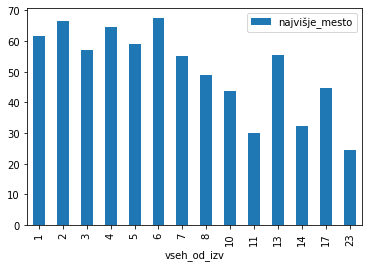

In [24]:
pesmi.groupby('vseh_od_izv').mean().plot(y='najvišje_mesto',kind='bar')

# Vpliv števila črk oz. besed v naslovu pesmi
Da dolžina naslova pesmi vpliva na njen uspeh, je bila ena izmed mojih prvih hipotez. Redko zasledim uspešno novo pesem, ki ima več kot tri besede v naslovu. Kot lahko vidimo na grafu, je imelo največ pesmi naslov iz dveh besed, tem so sledile pesmi z enobesednim naslovom. Najdaljši naslov med vsemi je imela pesem 'The remedy for a broken heart (why am I so in love)'.

<AxesSubplot:xlabel='wrdz'>

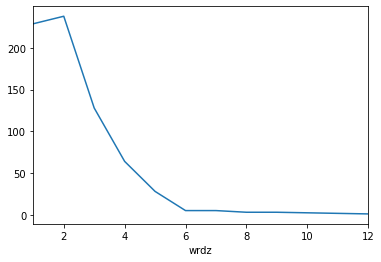

In [31]:
pesmi.groupby('wrdz').size().plot()

In [30]:
pesmi[pesmi['wrdz'] == 12]

,ime_izvajalca,naslov_pesmi,tednov_na_lestvici,najvišje_mesto,povp_mesto,vseh_od_izv,feats,wrdz,ltrz
275,XXXTENTACION,The Remedy For A Broken Heart (Why Am I So In ...,5,67,75.0,17,1,12,51


<AxesSubplot:xlabel='ltrz'>

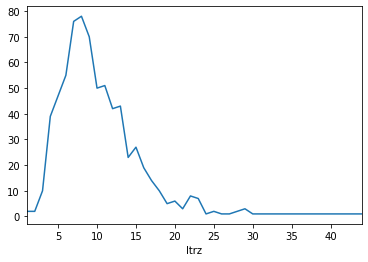

In [45]:
pesmi.groupby('ltrz').size().plot()

Izrazito poglobljenih rezultatov s to primerjavo nisem dobil, vidi se le, da pesmi, ki so bile na lestvici prisotne dalj časa, načeloma niso imele zelo dolgega naslova. Čeprav je bilo več pesmi z naslovom iz dveh besed kot iz ene, so te skupno preživele manj časa na lestvici, kot tiste z enobesednim naslovom.

<AxesSubplot:xlabel='tednov_na_lestvici', ylabel='ltrz'>

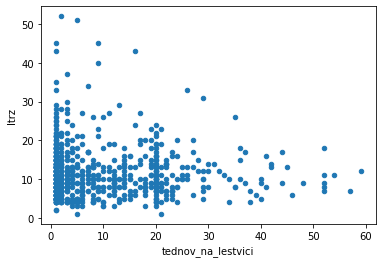

In [46]:
pesmi.plot(x='tednov_na_lestvici',y='ltrz',kind='scatter')

<AxesSubplot:xlabel='wrdz', ylabel='tednov_na_lestvici'>

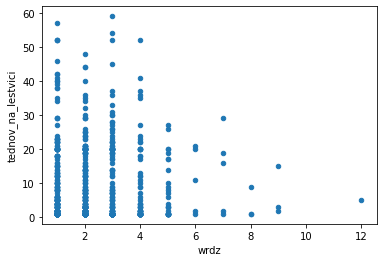

In [35]:
pesmi.plot(x='wrdz',y='tednov_na_lestvici',kind='scatter')

<AxesSubplot:xlabel='wrdz'>

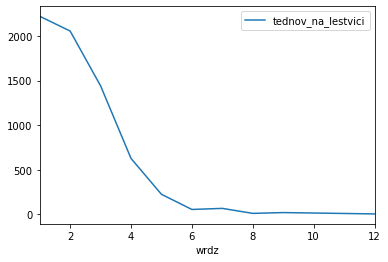

In [42]:
pesmi.groupby('wrdz').sum().plot(y='tednov_na_lestvici')

# Vpliv števila izvajalcev pesmi
Več kot četrtina vseh pesmi na lestvicah je imelo vsaj enega gostujočega izvajalca. Kljub pričakovanjem, da dva 'hitmakerja' skupaj naredita še večji hit, ni bilo večjih razlik med povprečnimi rezultati pesmi z enim ali več izvajalci.

In [58]:
pesmi.groupby('feat').size()

feat
False    439
True     265
dtype: int64

In [55]:
pesmi.groupby('st_izv').size()

feats
1    439
2    206
3     42
4     14
5      2
6      1
dtype: int64

<AxesSubplot:xlabel='feat'>

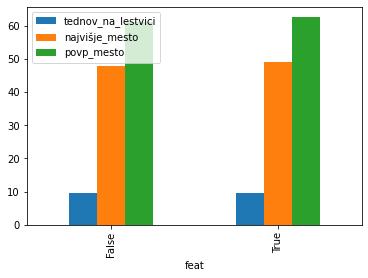

In [74]:
pesmi.groupby('feat').mean().plot(y=['tednov_na_lestvici','najvišje_mesto','povp_mesto'],kind='bar')

<AxesSubplot:xlabel='feats'>

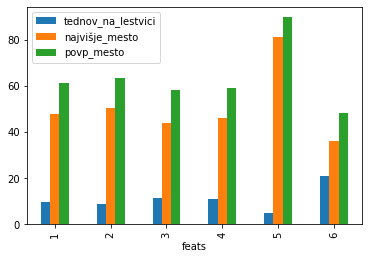

In [73]:
pesmi.groupby('st_izv').mean().plot(y=['tednov_na_lestvici','najvišje_mesto','povp_mesto'],kind='bar')

# Povezava med podatki o mestih na lestvici
Končno pridemo še do poglavja, kjer sem pričakoval največ vzporednic. Smiselno je sklepati, da so pesmi, ki so bile na lestvici top100 dolgo časa, nekoč dosegle zelo visoko mesto. Čeprav se naš sklep izkaže za pravilnega, vidimo tudi nekaj 'muh enodnevnic', ki niso dolgo zasedale lestvice, ampak so dosegle zgornjih 10 mest.

<AxesSubplot:xlabel='tednov_na_lestvici', ylabel='najvišje_mesto'>

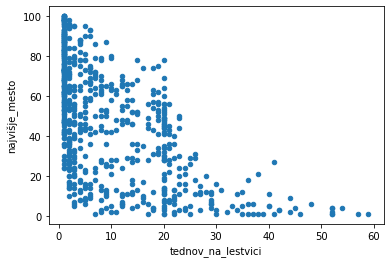

In [35]:
pesmi.plot(x='tednov_na_lestvici', y='najvišje_mesto', kind= 'scatter')

Naslednji graf prikazuje odvisnost najvišjega mesta pesmi od njenega povprečnega mesta. 

<AxesSubplot:xlabel='najvišje_mesto', ylabel='povp_mesto'>

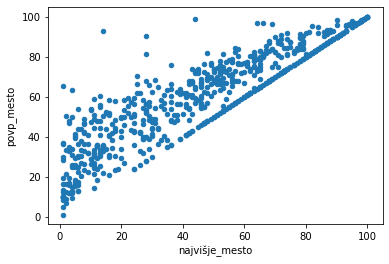

In [70]:
pesmi.plot(x='najvišje_mesto', y='povp_mesto', kind= 'scatter')